# YOLOv8 Object Detection Sample Project

In [ ]:
!nvidia-smi

Wed Jun 19 05:06:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installing the YOLOv8 model


In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Exporting the custom annotated dataset from roboflow

In [33]:
!pip install roboflow
import config

from roboflow import Roboflow
rf = Roboflow(config.api_key)
project = rf.workspace("aju57").project("helmet-detection-2cu9l")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


**Training the model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Helmet-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


**Running inference on Training set**

/content


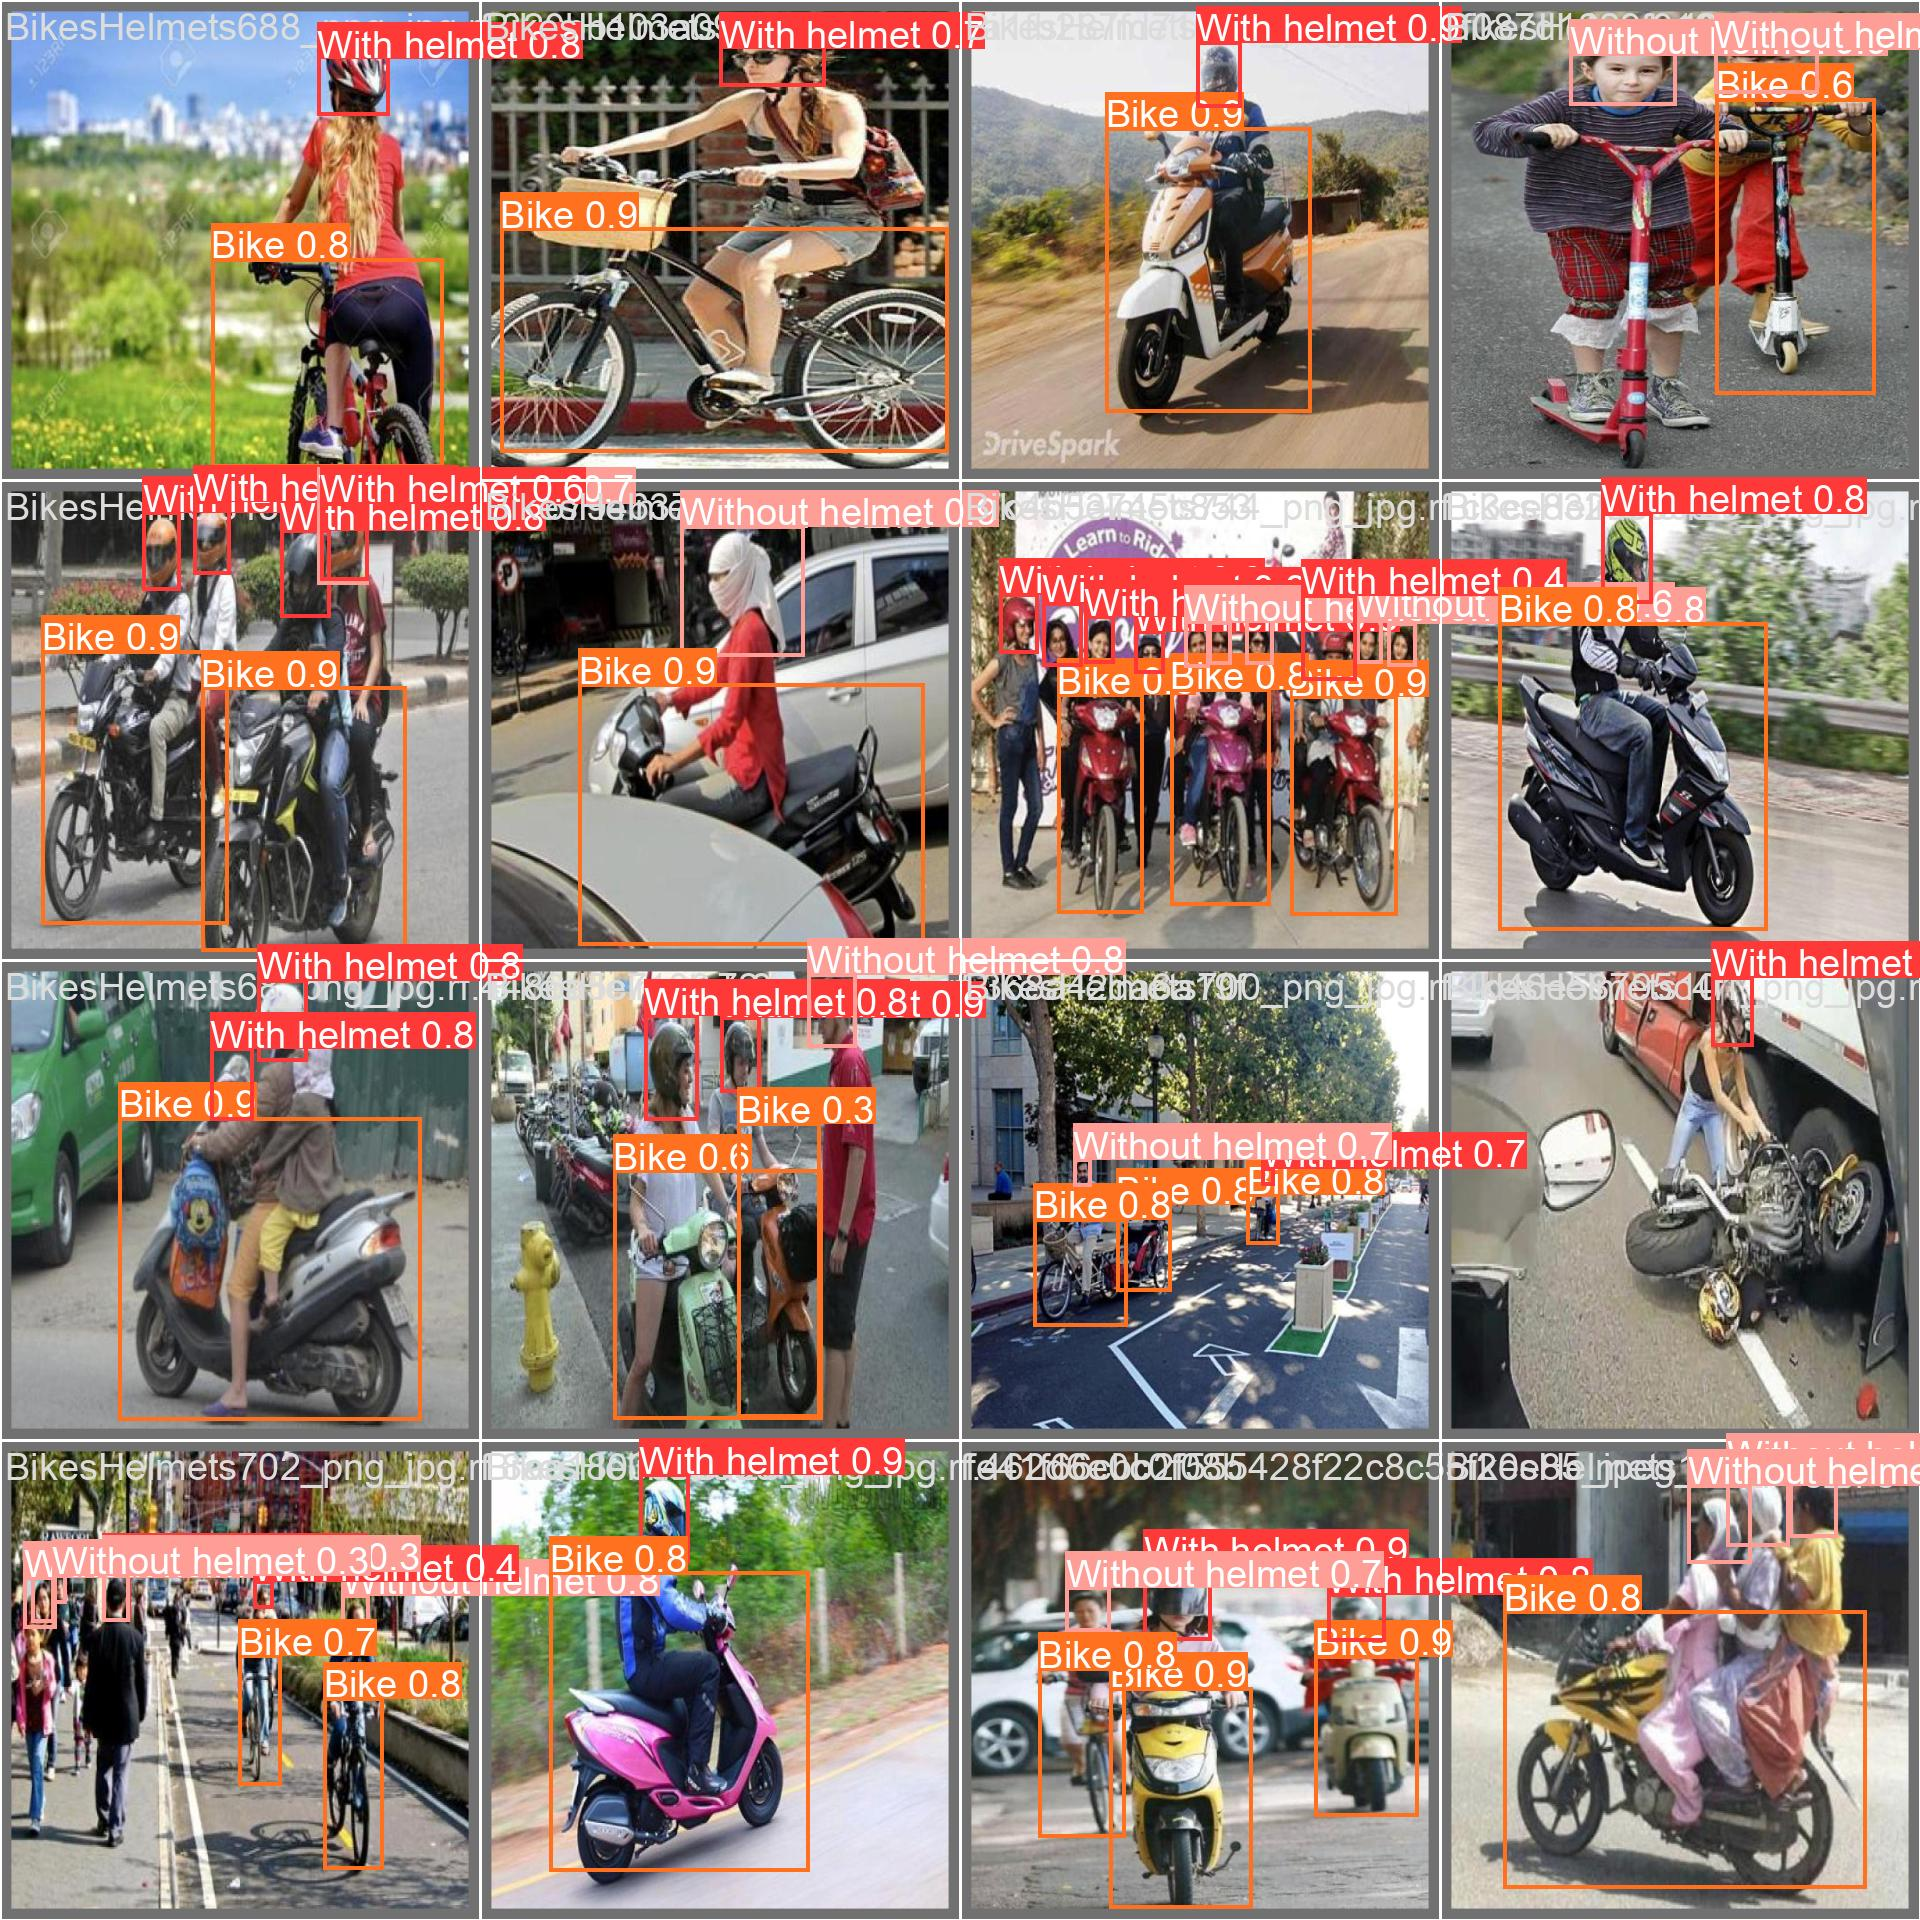

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch2_pred.jpg', width=600)

** Predicting the objects from images in the test set. **

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Helmet-detection-1/valid/labels.cache... 153 images, 0 backgrounds, 0 corrupt: 100% 153/153 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:08<00:00,  1.15it/s]
                   all        153        867       0.74      0.699      0.736       0.35
           With helmet        153        268      0.775      0.784      0.808      0.451
        Without helmet        153        244      0.659      0.574      0.605      0.208
                  Bike        153        355      0.785       0.74      0.794      0.393
Speed: 1.9ms preprocess, 12.4ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/80 /content/Helmet-detection-1/test/images/16d10b67b694bfd948ac3e475af64d49_jpeg_jpg.rf.cf3986aeb67a8c5a3a9e3a0163063672.jpg: 640x640 1 With helmet, 1 Bike, 16.3ms
image 2/80 /content/Helmet-detection-1/test/images/2746a63a309a4c88c2571827cce029e4_jpeg_jpg.rf.16e8465fdecdd42a0f246beda1e89a73.jpg: 640x640 3 With helmets, 5 Bikes, 16.4ms
image 3/80 /content/Helmet-detection-1/test/images/4f14f1d52dd1b59efafd07845b7a470_jpg.rf.b6e6a6742dc474a2477d34faf8a36a40.jpg: 640x640 3 With helmets, 2 Without helmets, 6 Bikes, 16.3ms
image 4/80 /content/Helmet-detection-1/test/images/690aad1fe68091057ff9f8fa931d7f63_jpeg_jpg.rf.0e557ed0f1ddcda9c6a067fe75af8473.jpg: 640x640 3 With helmets, 1 Without helmet, 4 Bikes, 16.4ms
image 5/80 /content/Helmet-detection-1/test/images/774

# Displaying the results predicted from the test set images.

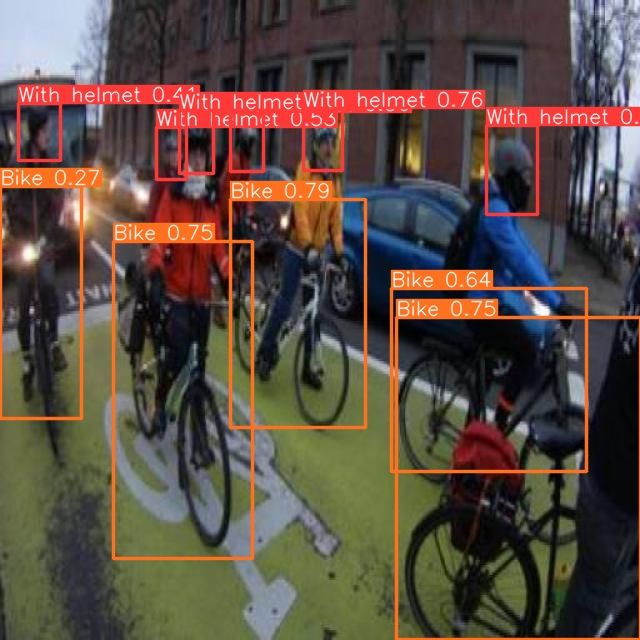

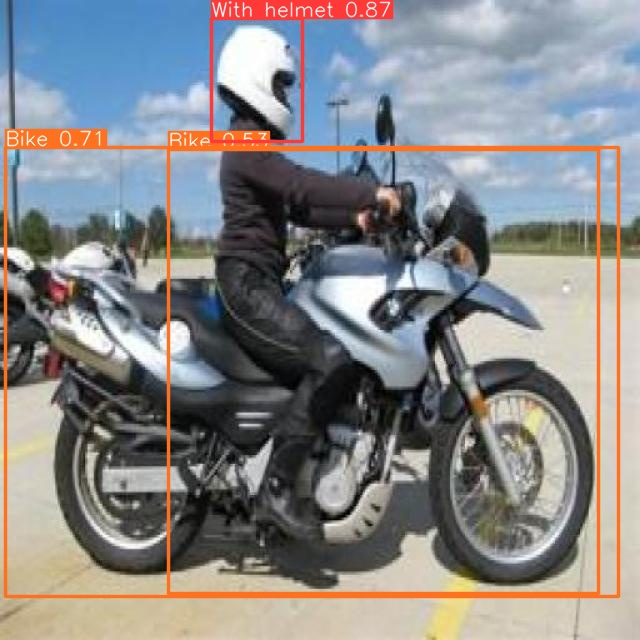

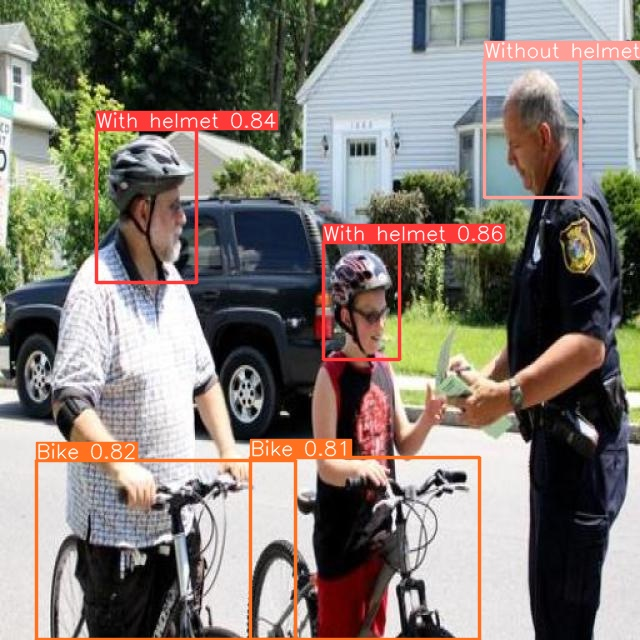

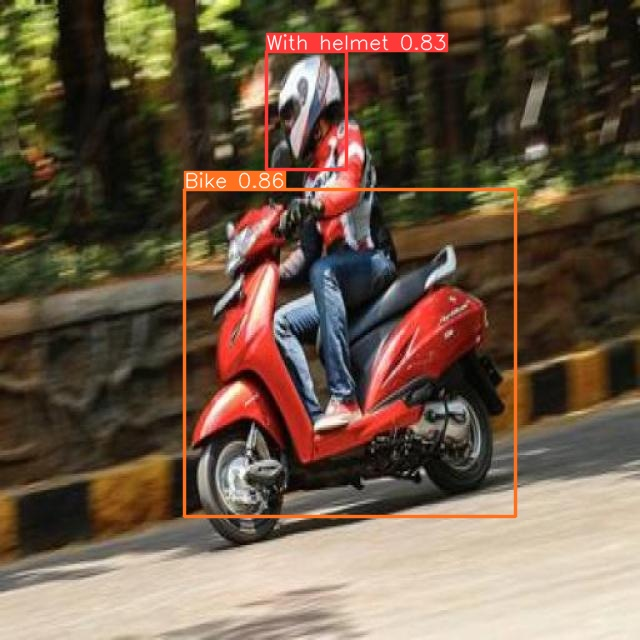

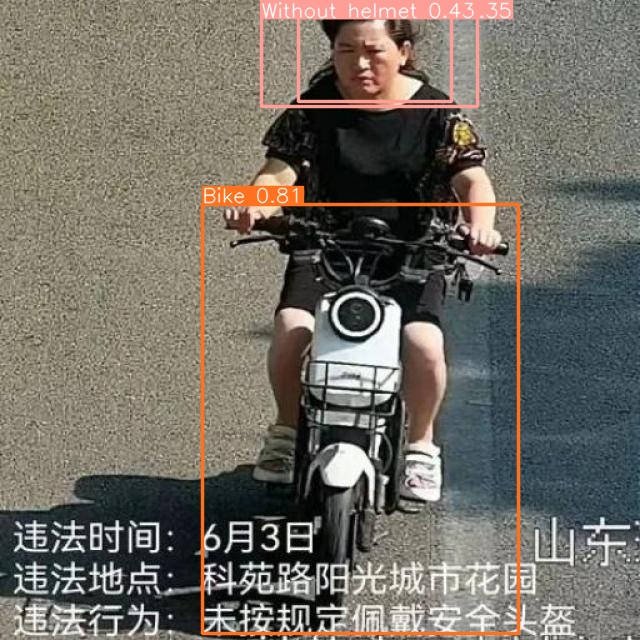

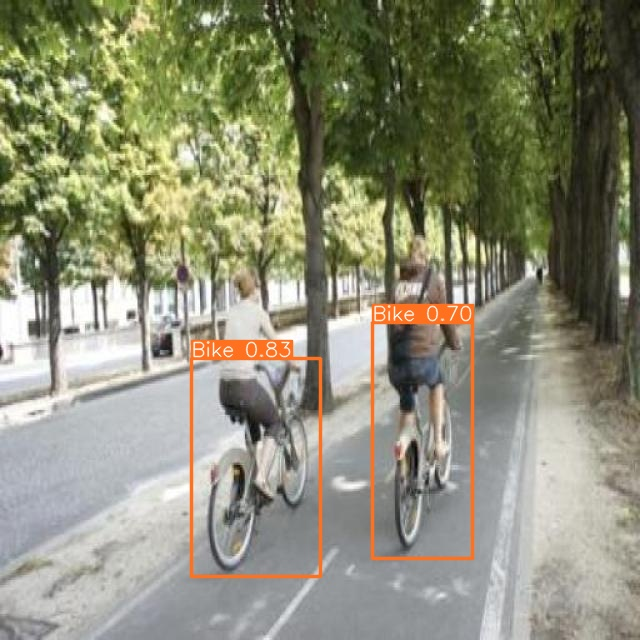

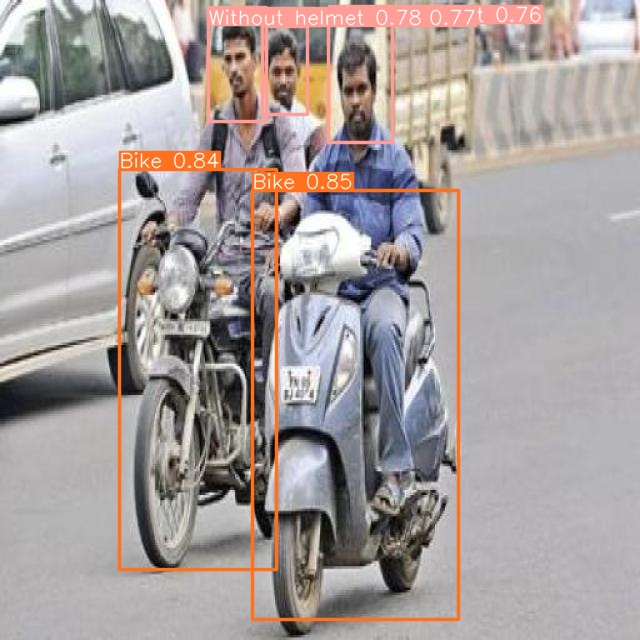

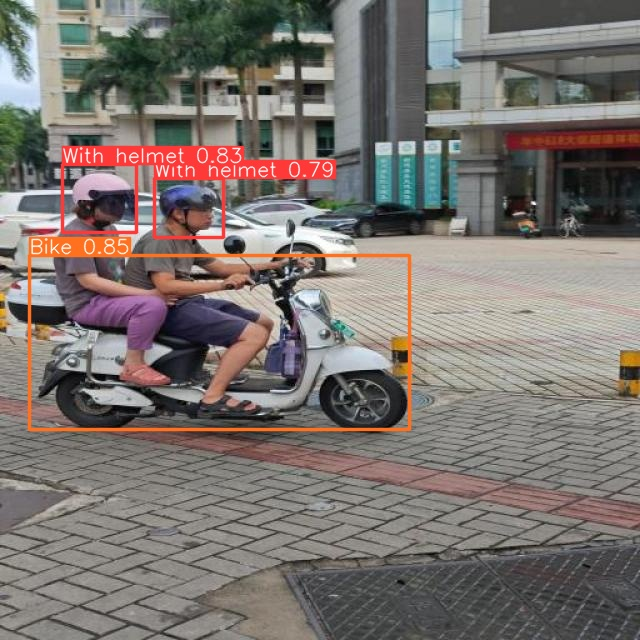

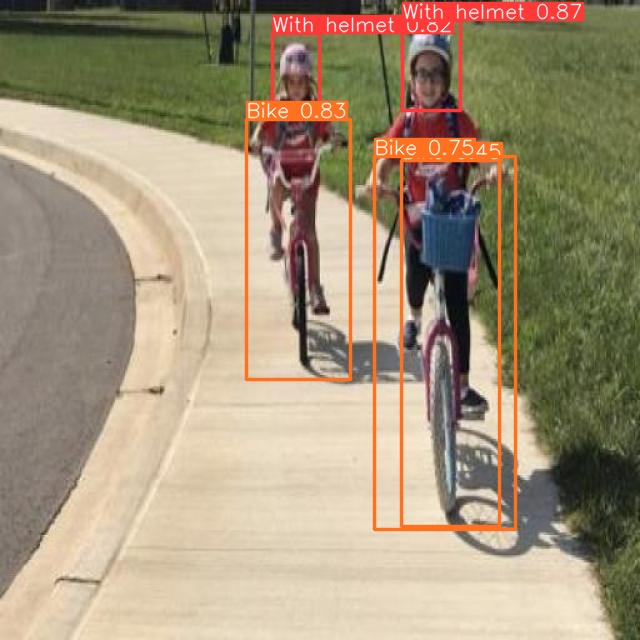

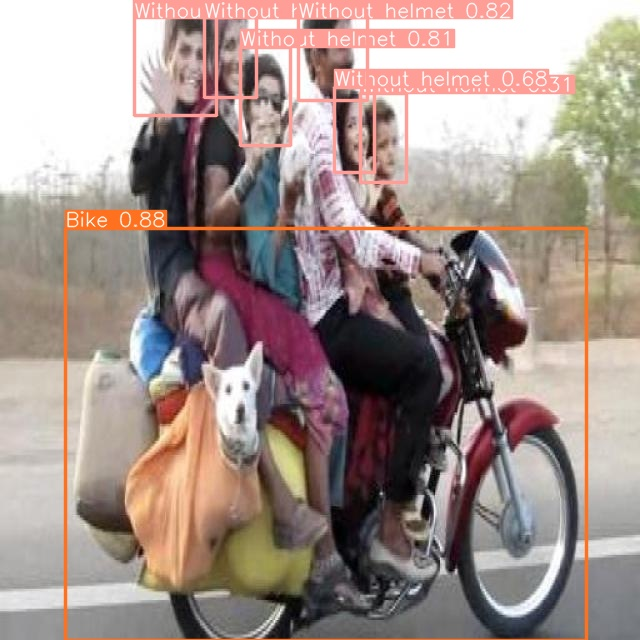

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")